In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:
# Define classes and their labels
classes = {'no_tumor': 0, 'pituitary_tumor': 1}


In [4]:
# Load training data
X = []
Y = []
for cls, label in classes.items():
    pth = f'brain_tumor-dataset/Training/{cls}'
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(label)


In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
# Flatten and normalize data
X_flatten = X.reshape(len(X), -1) / 255.0


In [7]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_flatten, Y, random_state=10, test_size=0.20)


In [8]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

In [9]:
# Train models
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [10]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [11]:
# Evaluate models
print("Logistic Regression - Training Score:", lg.score(pca_train, ytrain))
print("Logistic Regression - Testing Score:", lg.score(pca_test, ytest))
print("SVM - Training Score:", sv.score(pca_train, ytrain))
print("SVM - Testing Score:", sv.score(pca_test, ytest))

Logistic Regression - Training Score: 1.0
Logistic Regression - Testing Score: 0.9551020408163265
SVM - Training Score: 0.9969293756397134
SVM - Testing Score: 0.9510204081632653


In [12]:
# Visualize misclassified samples
pred = sv.predict(pca_test)
misclassified = np.where(ytest != pred)
print("Total Misclassified Samples: ", len(misclassified[0]))

Total Misclassified Samples:  12


<Figure size 1200x800 with 0 Axes>

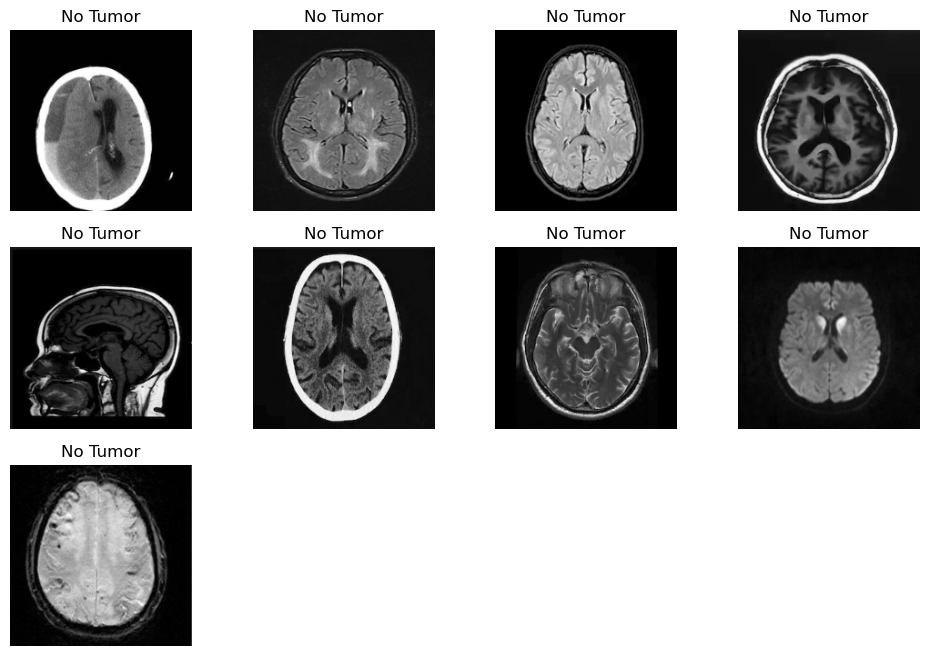

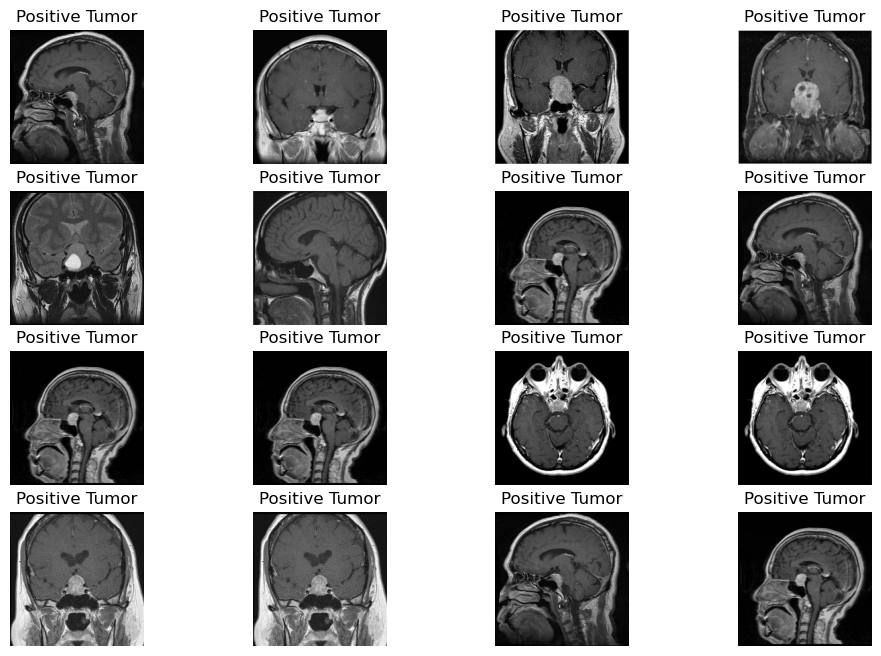

In [13]:
# Visualize test images and predictions
dec = {0: 'No Tumor', 1: 'Positive Tumor'}
plt.figure(figsize=(12, 8))
test_images_path = 'brain_tumor-dataset/Testing/'
for cls in classes:
    plt.figure(figsize=(12, 8))
    pth = os.path.join(test_images_path, cls)
    images = os.listdir(pth)[:9] if cls == 'no_tumor' else os.listdir(pth)[:16]
    for i, img_file in enumerate(images):
        plt.subplot(3 if cls == 'no_tumor' else 4, 4, i + 1)
        img = cv2.imread(os.path.join(pth, img_file), 0)
        img = cv2.resize(img, (200, 200))
        img = img.reshape(200, 200)  # Remove the reshaping for imshow
        p = sv.predict(pca.transform(img.reshape(1, -1) / 255))  # Reshape for prediction
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')


In [14]:
plt.show()

In [15]:
# User Input and Prediction
user_input_path = input("Enter the path to your MRI image in jpg format: ")
user_img = cv2.imread(user_input_path, 0)
user_img_resized = cv2.resize(user_img, (200, 200))
user_img_flatten = user_img_resized.reshape(1, -1) / 255
user_pca = pca.transform(user_img_flatten)

Enter the path to your MRI image in jpg format: brain_tumor-dataset\Testing\no_tumor\image.jpg


In [16]:
user_prediction = sv.predict(user_pca)
user_prediction_label = dec[user_prediction[0]]


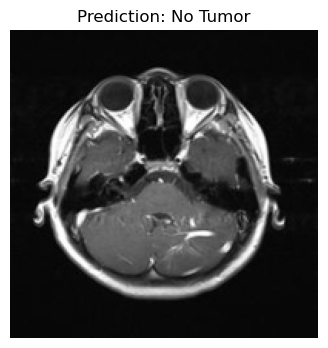

In [17]:
plt.figure(figsize=(6, 4))
plt.imshow(user_img_resized, cmap='gray')
plt.title(f"Prediction: {user_prediction_label}")
plt.axis('off')
plt.show()